In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [112]:
df=pd.read_csv("Downloads/test_AbJTz2l.csv")

In [113]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [115]:
df.shape

(5681, 11)

In [116]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [117]:
df["Item_Weight"].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [118]:
df.duplicated().sum()

0

In [119]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [121]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [122]:
df["Item_Weight"].mean()

12.695633368756374

In [123]:
df["Item_Weight"].median()

12.5

In [124]:
df["Item_Weight"]

0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64

<AxesSubplot:>

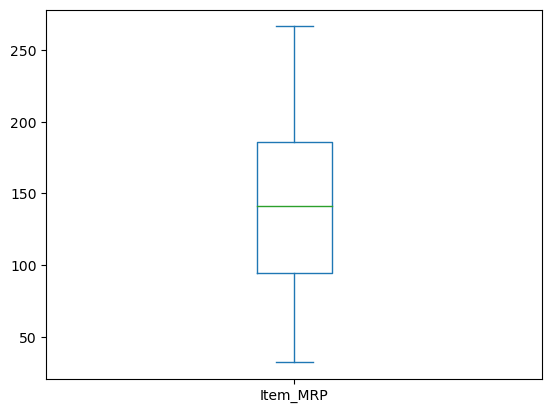

In [125]:
df['Item_MRP'].plot(kind= 'box')

In [126]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

<AxesSubplot:>

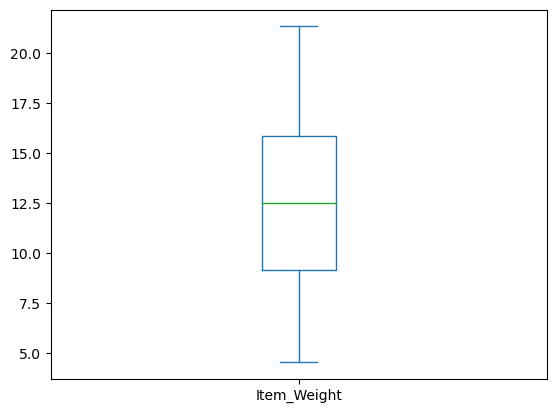

In [127]:
df['Item_Weight'].plot(kind= 'box')

<AxesSubplot:>

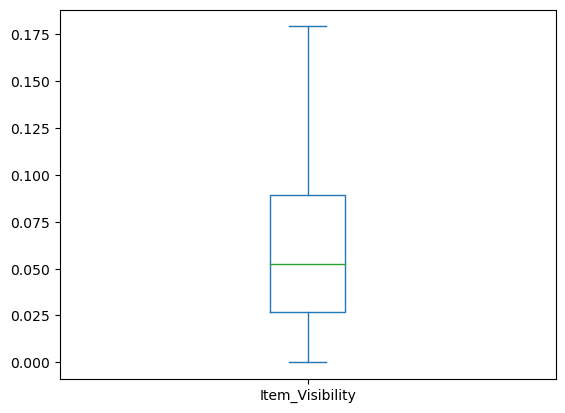

In [135]:
df['Item_Visibility'].plot(kind= 'box')

In [133]:
#Script to find the outliers
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  403     0.189512
1042    0.188151
2751    0.187416
2857    0.186650
3144    0.185913
3340    0.188966
3768    0.186911
4077    0.186296
Name: Item_Visibility, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)


In [134]:
df = df[~(df['Item_Visibility']>0.18)]

In [136]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [144]:
df.shape

(5530, 11)

In [145]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [11]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [142]:
df['Outlet_Size'].mode()[0]

'Medium'

In [143]:
c

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [147]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5530 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5530 non-null   object 
 1   Item_Weight                5530 non-null   float64
 2   Item_Fat_Content           5530 non-null   object 
 3   Item_Visibility            5530 non-null   float64
 4   Item_Type                  5530 non-null   object 
 5   Item_MRP                   5530 non-null   float64
 6   Outlet_Identifier          5530 non-null   object 
 7   Outlet_Establishment_Year  5530 non-null   int64  
 8   Outlet_Size                5530 non-null   object 
 9   Outlet_Location_Type       5530 non-null   object 
 10  Outlet_Type                5530 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 518.4+ KB


In [148]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

In [149]:
#Script to find the outliers
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  Series([], Name: Item_Visibility, dtype: float64)
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)


In [150]:
scaling = MinMaxScaler()

In [151]:
data_num = df.select_dtypes(include = np.number)

In [152]:
data_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.500,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


In [153]:
pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0.964275,0.042216,0.323413,0.583333
1,0.222983,0.214450,0.235849,0.916667
2,0.598095,0.555689,0.894140,0.541667
3,0.164335,0.085877,0.524488,0.916667
4,0.473057,0.661857,0.862069,0.000000
...,...,...,...,...
5525,0.353974,0.075319,0.466011,0.500000
5526,0.181304,0.797977,0.584637,1.000000
5527,0.324204,0.410334,0.369798,0.708333
5528,0.639774,0.000000,0.778487,0.916667


In [154]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [155]:
data_scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1.895023,-1.227610,-0.540246,0.122915
1,-1.022596,-0.521665,-0.873051,1.080770
2,0.453790,0.876991,1.628914,0.003183
3,-1.253427,-1.048657,0.223978,1.080770
4,-0.038339,1.312148,1.507022,-1.553333
...,...,...,...,...
5525,-0.507032,-1.091932,0.001725,-0.116549
5526,-1.186639,1.870071,0.452585,1.320234
5527,-0.624206,0.281218,-0.363951,0.482111
5528,0.617833,-1.400645,1.189352,1.080770


In [156]:
df['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat','low fat':'Low Fat'}, inplace = True)

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [157]:
df['Item_Fat_Content'].value_counts()

Low Fat    3580
Regular    1950
Name: Item_Fat_Content, dtype: int64

In [158]:
data_cat = df.select_dtypes(exclude = np.number)

In [159]:
data_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,Regular,Dairy,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
5678,NCO17,Low Fat,Health and Hygiene,OUT045,Medium,Tier 2,Supermarket Type1
5679,FDJ26,Regular,Canned,OUT017,Medium,Tier 2,Supermarket Type1


In [160]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [161]:
data_cat['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Low Fat
4       Regular
         ...   
5676    Regular
5677    Regular
5678    Low Fat
5679    Regular
5680    Regular
Name: Item_Fat_Content, Length: 5530, dtype: object

In [162]:
data_gender_cat_IFC = pd.get_dummies(data_cat['Item_Fat_Content'])

In [163]:
data_gender_cat_IFC

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
5676,0,1
5677,0,1
5678,1,0
5679,0,1


In [164]:
df['Outlet_Size'].replace({'Small':0, 'Medium':1, 'High':2}, inplace = True)

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [165]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,0,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,1,Tier 2,Supermarket Type1


In [166]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,0,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,1,Tier 2,Supermarket Type1


In [167]:
df['Outlet_Type'].replace({'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3}, inplace = True)

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [168]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,0,Tier 1,1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,Tier 2,1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,1,Tier 2,1


In [169]:
df['Outlet_Location_Type'].replace({'Tier 1':1, 'Tier 2':2, 'Tier 3':3}, inplace = True)

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [170]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,1,1,1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,1,2,1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,1,3,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,1,2,1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,0,1,1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,1,3,2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,2,1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,1,2,1


In [171]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [172]:
df.drop('Item_Identifier', axis=1, inplace=True)

C:\Users\sridhara\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [173]:
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [174]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,1,1,1
1,8.300,Regular,0.038428,Dairy,87.3198,2007,1,2,1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,1,3,0
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,1,2,1
4,12.500,Regular,0.118599,Dairy,234.2300,1985,1,3,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,0,1,1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,1,3,2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,1,2,1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,1,2,1


In [175]:
data_gender_cat_IFC

,Low Fat,Regular
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
5676,0,1
5677,0,1
5678,1,0
5679,0,1


In [176]:
data_gender_cat_IT = pd.get_dummies(data_cat['Item_Type'])

In [177]:
data_gender_cat_IT

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5679,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [178]:
data_scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1.895023,-1.227610,-0.540246,0.122915
1,-1.022596,-0.521665,-0.873051,1.080770
2,0.453790,0.876991,1.628914,0.003183
3,-1.253427,-1.048657,0.223978,1.080770
4,-0.038339,1.312148,1.507022,-1.553333
...,...,...,...,...
5525,-0.507032,-1.091932,0.001725,-0.116549
5526,-1.186639,1.870071,0.452585,1.320234
5527,-0.624206,0.281218,-0.363951,0.482111
5528,0.617833,-1.400645,1.189352,1.080770


In [179]:
data_scale = data_scale.reset_index().drop(columns = 'index')
data_gender_cat_IFC = data_gender_cat_IFC.reset_index().drop(columns = 'index')
data_gender_cat_IT = data_gender_cat_IT.reset_index().drop(columns = 'index')

In [180]:
df1=pd.concat([data_scale, data_gender_cat_IFC, data_gender_cat_IT], axis = 1)

In [181]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,1.895023,-1.227610,-0.540246,0.122915,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.022596,-0.521665,-0.873051,1.080770,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.453790,0.876991,1.628914,0.003183,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.253427,-1.048657,0.223978,1.080770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.038339,1.312148,1.507022,-1.553333,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525,-0.507032,-1.091932,0.001725,-0.116549,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5526,-1.186639,1.870071,0.452585,1.320234,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5527,-0.624206,0.281218,-0.363951,0.482111,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5528,0.617833,-1.400645,1.189352,1.080770,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

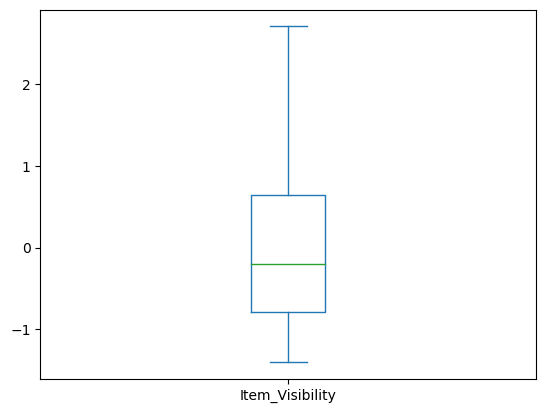

In [189]:
df1['Item_Visibility'].plot(kind= 'box')

In [183]:
df1.shape

(5530, 22)

In [188]:
skewness = df1.skew()
print(skewness)

Item_Weight                   0.164230
Item_Visibility               0.684991
Item_MRP                      0.130004
Outlet_Establishment_Year    -0.418585
Low Fat                      -0.617087
Regular                       0.617087
Baking Goods                  3.145001
Breads                        5.622228
Breakfast                     8.413411
Canned                        3.212013
Dairy                         3.098934
Frozen Foods                  2.691038
Fruits and Vegetables         2.113333
Hard Drinks                   5.931605
Health and Hygiene            3.698392
Household                     2.445131
Meat                          3.883296
Others                        7.015415
Seafood                      14.775756
Snack Foods                   2.089058
Soft Drinks                   4.170377
Starchy Foods                 6.596680
dtype: float64
